### Importando as bibliotecas

In [555]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Filtrando a base e limpando os dados

In [556]:
data = pd.read_csv('PNS_2019.csv', sep='\t', encoding='utf-8')

In [557]:
filter_columns = [
    'Unidade da Federação', 
    'Tipo de situação censitária', 
    'Algum morador tem acesso à Internet no domicílio por meio de computador, tablet, telefone móvel celular, televisão ou outro equipamento?',
    'Sexo', 
    'Idade do morador na data de referência', 
    'Cor ou raça', 
    'Sabe ler e escrever', 
    'Qual foi o curso mais elevado que ___frequentou ',
    'tem algum plano de saúde médico particular, de empresa ou órgão público?', 
    'Em geral, como o(a) Sr(a) avalia a sua saúde', 
    'Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)? ', 
    'Algum médico já lhe deu o diagnóstico de diabetes? ',
    'Algum médico já lhe deu o diagnóstico de colesterol alto? ',
    'Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?', 
    'Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)? ', 
    'Algum médico já lhe deu o diagnóstico de artrite ou reumatismo? ',
    'Algum médico já lhe deu o diagnóstico de DORT? ',
    'Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?',
    'Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ',
    'Diagnóstico de Esquizofrenia ',
    'Diagnóstico de Transtorno bipolar ',
    'Diagnóstico de TOC (Transtorno obsessivo compulsivo) ',
    'O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?',
    'Por causa da doença mental usa medicamentos ou injeções ',
    'Por causa da doença mental Faz acompanhamento regular com profissional de saúde',
    'Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)? ',
    'Quando foi a última vez que o(a) sr(a) consultou com um(a) médico(a)?',
    'Por qual motivo o(a) sr(a) precisou consultar com um(a) médico(a)',
    'É difícil para você conseguir atendimento médico no(a) "serviço de saúde” quando pensa que é necessário?',
    'Quando o(a) “serviço de saúde” está aberto(a), você consegue aconselhamento rápido pelo telefone se precisar?',
    'Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental? ',
    'Por causa da doença mental faz psicoterapia ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer feijão? ',
    'Em quantos dias da semana, o(a) Sr(a) costuma comer pelo menos um tipo de verdura ou legume (sem contar batata, mandioca, cará ou inhame) como alface, tomate, couve, cenoura, chuchu, berinjela, abobrinha? ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer carne vermelha (boi, porco, cabrito, bode, ovelha etc.)? ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer frango/galinha? ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer peixe? ',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar suco de caixinha/lata ou refresco em pó ? ',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar suco de fruta natural (incluída a polpa de fruta congelada)? ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer frutas? ',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar refrigerante? ',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar leite? (de origem animal: vaca, cabra, búfala etc.) ',
    'Em quantos dias da semana o(a) Sr(a) costuma comer alimentos doces como biscoito/bolacha recheado, chocolate, gelatina, balas e outros?',
    'Em quantos dias da semana o(a) Sr(a) costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc? ',
    'Quantos dias por semana o(a) Sr(a) costuma consumir alguma bebida alcoólica? ',
    'Quantos dias por semana o(a) Sr(a) costuma  (costumava)praticar exercício físico ou esporte?'
]

data = data[filter_columns]

In [558]:
data.shape

(293726, 46)

In [559]:
data.rename(columns={
    'Unidade da Federação': 'UF',
    'Tipo de situação censitária': 'Situação Censitária',
    'Algum morador tem acesso à Internet no domicílio por meio de computador, tablet, telefone móvel celular, televisão ou outro equipamento?': 'Acesso à Internet',
    'Idade do morador na data de referência': 'Idade',
    'Cor ou raça': 'Cor/Raça',
    'Sabe ler e escrever': 'Sabe Ler/Escrever',
    'Qual foi o curso mais elevado que ___frequentou ': 'Curso Mais Elevado',
    'tem algum plano de saúde médico particular, de empresa ou órgão público?': 'Possuí Plano de Saúde',
    'Em geral, como o(a) Sr(a) avalia a sua saúde': 'Autoavaliação da Saúde',
    'Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)? ': 'Diagnóstico de Hipertensão',
    'Algum médico já lhe deu o diagnóstico de diabetes? ': 'Diagnóstico de Diabetes',
    'Algum médico já lhe deu o diagnóstico de colesterol alto? ': 'Diagnóstico de Colesterol Alto',
    'Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?': 'Diagnóstico de AVC',
    'Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)? ': 'Diagnóstico de Asma',
    'Algum médico já lhe deu o diagnóstico de artrite ou reumatismo? ': 'Diagnóstico de Artrite/Reumatismo',
    'Algum médico já lhe deu o diagnóstico de DORT? ': 'Diagnóstico de DORT',
    'Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?': 'Diagnóstico de Depressão',
    'Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ': 'Diagnóstico de Outra Doença Mental',
    'Diagnóstico de Esquizofrenia ': 'Diagnóstico de Esquizofrenia',
    'Diagnóstico de Transtorno bipolar ': 'Diagnóstico de Transtorno Bipolar',
    'Diagnóstico de TOC (Transtorno obsessivo compulsivo) ': 'Diagnóstico de TOC',
    'O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?': 'Visita Médico Regularmente',
    'Por causa da doença mental usa medicamentos ou injeções ': 'Uso Medicamentos/Injeções',
    'Por causa da doença mental Faz acompanhamento regular com profissional de saúde': 'Acompanhamento Regular',
    'Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)? ': 'Limitação das Atividades Diárias',
    'Quando foi a última vez que o(a) sr(a) consultou com um(a) médico(a)?': 'Última Consulta Médica',
    'Por qual motivo o(a) sr(a) precisou consultar com um(a) médico(a)': 'Motivo da Consulta Médica',
    'É difícil para você conseguir atendimento médico no(a) "serviço de saúde” quando pensa que é necessário?': 'Dificuldade Atendimento Médico',
    'Quando o(a) “serviço de saúde” está aberto(a), você consegue aconselhamento rápido pelo telefone se precisar?': 'Aconselhamento Médico Rápido por Telefone',
    'Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental? ': 'Idade Primeiro Diagnóstico de Doença Mental',
    'Por causa da doença mental faz psicoterapia ': 'Faz Psicoterapia',
    'Em quantos dias da semana o(a) Sr(a) costuma comer feijão? ': 'Consumo de Feijão por Semana',
    'Em quantos dias da semana, o(a) Sr(a) costuma comer pelo menos um tipo de verdura ou legume (sem contar batata, mandioca, cará ou inhame) como alface, tomate, couve, cenoura, chuchu, berinjela, abobrinha? ': 'Consumo de Verdura ou Legume por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma comer carne vermelha (boi, porco, cabrito, bode, ovelha etc.)? ': 'Consumo de Carne Vermelha por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma comer frango/galinha? ': 'Consumo de Frango por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma comer peixe? ': 'Consumo de Peixe por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar suco de caixinha/lata ou refresco em pó ? ': 'Consumo de Suco Industrializado por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar suco de fruta natural (incluída a polpa de fruta congelada)? ': 'Consumo de Suco Natural por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma comer frutas? ': 'Consumo de Frutas por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar refrigerante? ': 'Consumo de Refrigerante por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma tomar leite? (de origem animal: vaca, cabra, búfala etc.) ': 'Consumo de Leite por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma comer alimentos doces como biscoito/bolacha recheado, chocolate, gelatina, balas e outros?': 'Consumo de Doces por Semana',
    'Em quantos dias da semana o(a) Sr(a) costuma substituir a refeição do almoço por lanches rápidos como sanduíches, salgados, pizza, cachorro quente, etc? ': 'Consumo de Fast Food por Semana',
    'Quantos dias por semana o(a) Sr(a) costuma consumir alguma bebida alcoólica? ': 'Consumo de Bebida Alcoólica por Semana',
    'Quantos dias por semana o(a) Sr(a) costuma  (costumava)praticar exercício físico ou esporte?': 'Pratica de Exercício por Semana'
}, inplace=True)


### Removendo as linhas em que o atributo target - 'Diagnóstico de TOC' - seja nulo/NAN

In [560]:
data = data.dropna(subset=['Diagnóstico de TOC'])
print(data['Diagnóstico de TOC'].value_counts())
print('Quantidade de nulos: ', data['Diagnóstico de TOC'].isnull().sum())

Diagnóstico de TOC
1.0    3741
2.0    1164
Name: count, dtype: int64
Quantidade de nulos:  0


In [561]:
print('Linhas: ', data.shape[0], '\nColunas: ', data.shape[1])

Linhas:  4905 
Colunas:  46


### Classificando Habitos Alimentares

In [562]:
nice_foods = [
    'Consumo de Feijão por Semana',
    'Consumo de Verdura ou Legume por Semana',
    'Consumo de Suco Natural por Semana',
    'Consumo de Frutas por Semana',
]

moderate_foods = [
    'Consumo de Carne Vermelha por Semana',
    'Consumo de Frango por Semana',
    'Consumo de Peixe por Semana',
    'Consumo de Leite por Semana',
]

bad_foods = [
    'Consumo de Suco Industrializado por Semana',
    'Consumo de Refrigerante por Semana',
    'Consumo de Doces por Semana',
    'Consumo de Fast Food por Semana',
    'Consumo de Bebida Alcoólica por Semana',
]

In [563]:
def food_score(data):
    pontos = 0

    for food in nice_foods:
        if data[food] == None:
            continue
        elif data[food] >= 4:
            pontos += 2
        elif data[food] >= 2:
            pontos += 1

    for food in moderate_foods:
        if data[food] == None:
            continue
        elif data[food] >= 2:
            pontos += 2
        elif data[food] >= 4:
            pontos += 1

    for food in bad_foods:
        if data[food] == None:
            continue
        elif data[food] <= 1:
            pontos += 2
        elif data[food] <= 3:
            pontos += 1

    return pontos

In [564]:
def set_habito_alimentares(soma):
    if soma >= 21:
        return 1
    elif soma >= 14:
        return 2
    else:
        return 3 

In [565]:
data['Hábitos Alimentares'] = data.apply(lambda row: set_habito_alimentares(food_score(row)), axis=1)
data['Hábitos Alimentares'].value_counts()

Hábitos Alimentares
2    3393
3     856
1     656
Name: count, dtype: int64

In [566]:
data = data.drop([
    'Consumo de Suco Industrializado por Semana',
    'Consumo de Refrigerante por Semana',
    'Consumo de Doces por Semana',
    'Consumo de Fast Food por Semana',
    'Consumo de Bebida Alcoólica por Semana', 
    'Consumo de Carne Vermelha por Semana',
    'Consumo de Frango por Semana',
    'Consumo de Peixe por Semana',
    'Consumo de Leite por Semana', 
    'Consumo de Feijão por Semana',
    'Consumo de Verdura ou Legume por Semana',
    'Consumo de Suco Natural por Semana',
    'Consumo de Frutas por Semana',]
    , axis=1)

### Tratando Dados Faltantes

In [567]:
dataMissing = data.isnull().sum()
print(dataMissing)

UF                                                0
Situação Censitária                               0
Acesso à Internet                                 0
Sexo                                              0
Idade                                             0
Cor/Raça                                          0
Sabe Ler/Escrever                                 0
Curso Mais Elevado                              744
Possuí Plano de Saúde                             0
Autoavaliação da Saúde                            0
Diagnóstico de Hipertensão                       33
Diagnóstico de Diabetes                         123
Diagnóstico de Colesterol Alto                  162
Diagnóstico de AVC                                0
Diagnóstico de Asma                               0
Diagnóstico de Artrite/Reumatismo                 0
Diagnóstico de DORT                               0
Diagnóstico de Depressão                       2626
Diagnóstico de Outra Doença Mental                0
Diagnóstico 

In [568]:
dataOk = dataMissing[dataMissing <= 2452].index

dataFiltred = data[dataOk]

data = dataFiltred

In [569]:
data.shape

(4905, 29)

### Imputando Dados

In [570]:
meanCurso = np.mean(data["Curso Mais Elevado"])
stdCurso = np.std(data["Curso Mais Elevado"], ddof=1)

topCurso = meanCurso + stdCurso 
bottomCurso = meanCurso - stdCurso

data.loc[data['Curso Mais Elevado'].isna(), 'Curso Mais Elevado'] =np.random.uniform(
    bottomCurso, topCurso, size=data['Curso Mais Elevado'].isna().sum()
)

In [571]:
meanHiperten = np.mean(data["Diagnóstico de Hipertensão"])
stdHiperten = np.std(data["Diagnóstico de Hipertensão"], ddof=1)

topHiperten = meanHiperten + stdHiperten
bottomHiperten = meanHiperten - stdHiperten

data.loc[data['Diagnóstico de Hipertensão'].isna(), 'Diagnóstico de Hipertensão'] = np.random.uniform(
    bottomHiperten, topHiperten, size=data['Diagnóstico de Hipertensão'].isna().sum()
    )

In [572]:
meanDiabetes = np.mean(data["Diagnóstico de Diabetes"])
stdDiabetes = np.std(data["Diagnóstico de Diabetes"], ddof=1)

topDiabetes = meanDiabetes + stdDiabetes
bottomDiabetes = meanDiabetes - stdDiabetes

data.loc[data['Diagnóstico de Diabetes'].isna(), 'Diagnóstico de Diabetes'] = np.random.uniform(
    bottomDiabetes, topDiabetes, size=data['Diagnóstico de Diabetes'].isna().sum()
    )

In [573]:
meanColesterol = np.mean(data["Diagnóstico de Colesterol Alto"])
stdColesterol = np.std(data["Diagnóstico de Colesterol Alto"], ddof=1)

topColesterol = meanColesterol + stdColesterol
bottomColesterol = meanColesterol - stdColesterol

data.loc[data['Diagnóstico de Colesterol Alto'].isna(), 'Diagnóstico de Colesterol Alto'] = np.random.uniform(
    bottomColesterol, topColesterol, size=data['Diagnóstico de Colesterol Alto'].isna().sum()
    )

In [574]:
meanConsulta = np.mean(data["Última Consulta Médica"])
stdConsulta = np.std(data["Última Consulta Médica"], ddof=1)

topConsulta = meanConsulta + stdConsulta
bottomConsulta = meanConsulta - stdConsulta

data.loc[data['Última Consulta Médica'].isna(), 'Última Consulta Médica'] = np.random.uniform(
    bottomConsulta, topConsulta, size=data['Última Consulta Médica'].isna().sum()
    )

In [575]:
dataMissing = data.isnull().sum()
print(dataMissing)

UF                                             0
Situação Censitária                            0
Acesso à Internet                              0
Sexo                                           0
Idade                                          0
Cor/Raça                                       0
Sabe Ler/Escrever                              0
Curso Mais Elevado                             0
Possuí Plano de Saúde                          0
Autoavaliação da Saúde                         0
Diagnóstico de Hipertensão                     0
Diagnóstico de Diabetes                        0
Diagnóstico de Colesterol Alto                 0
Diagnóstico de AVC                             0
Diagnóstico de Asma                            0
Diagnóstico de Artrite/Reumatismo              0
Diagnóstico de DORT                            0
Diagnóstico de Outra Doença Mental             0
Diagnóstico de Esquizofrenia                   0
Diagnóstico de Transtorno Bipolar              0
Diagnóstico de TOC  

### Análise de Outliers

In [576]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

PCA

In [577]:
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

In [578]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataScaled)

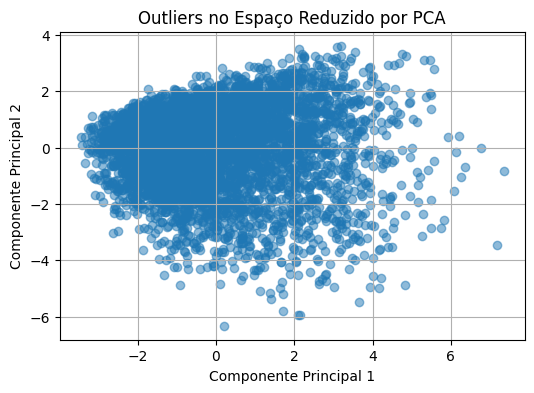

<Figure size 640x480 with 0 Axes>

In [579]:
plt.figure(figsize=(6, 4))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Outliers no Espaço Reduzido por PCA')
plt.grid()
plt.show()
plt.savefig('outliers_pca.png') 

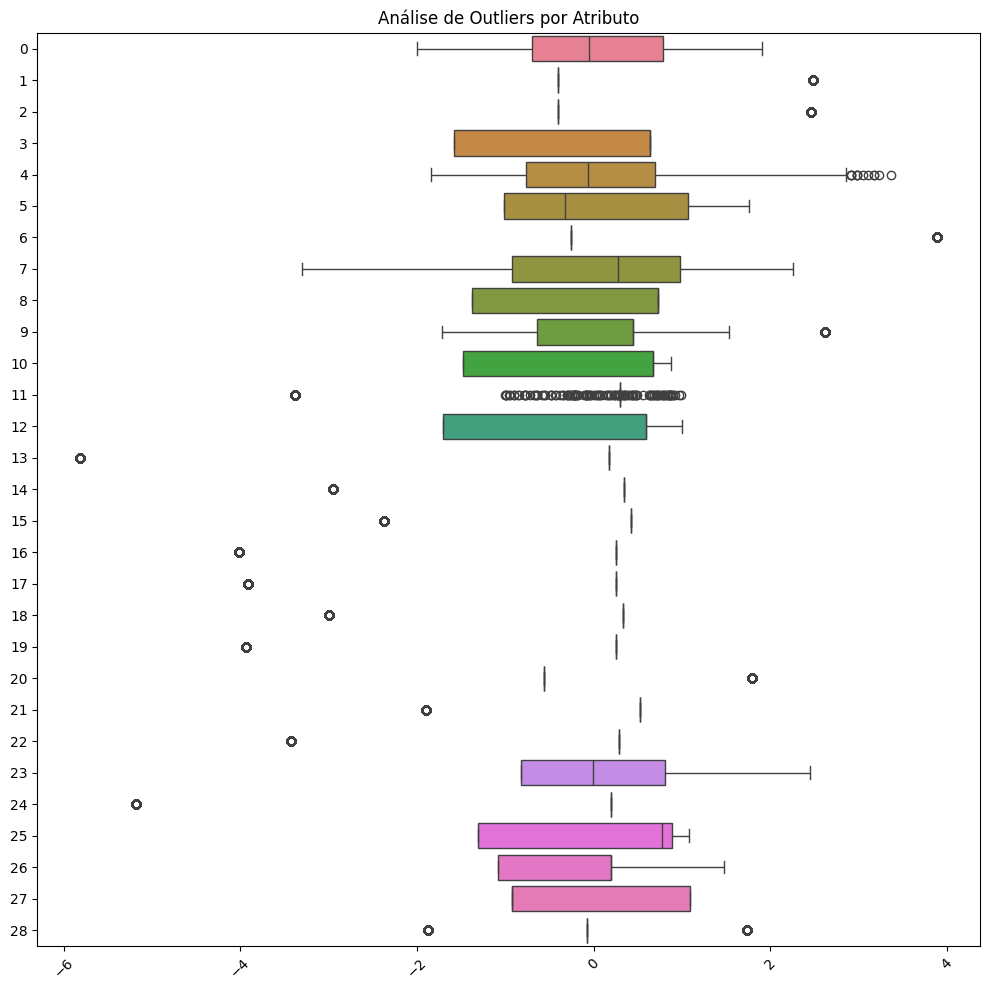

<Figure size 640x480 with 0 Axes>

In [580]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=dataScaled, orient="h")
plt.xticks(rotation=45)
plt.title('Análise de Outliers por Atributo')
plt.tight_layout()
plt.show()
plt.savefig('box_plot.png') 

### Gerando a base com dados tratados

In [581]:
data.to_csv('dados_tratados.csv', sep='\t', encoding='utf-8')

### Mapeamento dos atributos

In [582]:
def set_uf(uf):
    if uf == 11:
        return 'Rondônia'
    elif uf == 12:
        return 'Acre'
    elif uf == 13:
        return 'Amazonas'
    elif uf == 14:
        return 'Roraima'
    elif uf == 15:
        return 'Pará'
    elif uf == 16:
        return 'Amapá'
    elif uf == 17:
        return 'Tocantins'
    elif uf == 21:
        return 'Maranhão'
    elif uf == 22:
        return 'Piauí'
    elif uf == 23:
        return 'Ceará'
    elif uf == 24:
        return 'Rio Grande do Norte'
    elif uf == 25:
        return 'Paraíba'
    elif uf == 26:
        return 'Pernambuco'
    elif uf == 27:
        return 'Alagoas'
    elif uf == 28:
        return 'Sergipe'
    elif uf == 29:
        return 'Bahia'
    elif uf == 31:
        return 'Minas Gerais'
    elif uf == 32:
        return 'Espírito Santo'
    elif uf == 33:
        return 'Rio de Janeiro'
    elif uf == 35:
        return 'São Paulo'
    elif uf == 41:
        return 'Paraná'
    elif uf == 42:
        return 'Santa Catarina'
    elif uf == 43:
        return 'Rio Grande do Sul'
    elif uf == 50:
        return 'Mato Grosso do Sul'
    elif uf == 51:
        return 'Mato Grosso'
    elif uf == 52:
        return 'Goiás'
    elif uf == 53:
        return 'Distrito Federal'

In [583]:
data['UF'] = data['UF'].apply(set_uf)
data.UF.value_counts()

UF
São Paulo              461
Minas Gerais           372
Rio Grande do Sul      325
Rio de Janeiro         310
Espírito Santo         267
Paraná                 263
Ceará                  242
Pernambuco             223
Santa Catarina         220
Mato Grosso do Sul     203
Goiás                  195
Bahia                  190
Sergipe                178
Rio Grande do Norte    176
Paraíba                175
Piauí                  147
Distrito Federal       145
Maranhão               137
Alagoas                116
Mato Grosso             97
Tocantins               80
Rondônia                77
Acre                    71
Pará                    70
Amazonas                69
Roraima                 58
Amapá                   38
Name: count, dtype: int64

In [584]:
def set_situacao_censitaria(situacao_censitaria):
    if situacao_censitaria == 1:
        return 'Urbano'
    elif situacao_censitaria == 2:
        return 'Rural'

In [585]:
data['Situação Censitária'] = data['Situação Censitária'].apply(set_situacao_censitaria)
data['Situação Censitária'].value_counts()

Situação Censitária
Urbano    4221
Rural      684
Name: count, dtype: int64

In [586]:
def set_acesso_internet(acesso_internet):
    if pd.isna(acesso_internet):
        return 'Não aplicável'
    elif acesso_internet == 1:
        return 'Sim'
    elif acesso_internet == 2:
        return 'Não'
    elif acesso_internet == 9:
        return 'Ignorado'

In [587]:
data['Acesso à Internet'] = data['Acesso à Internet'].apply(set_acesso_internet)
data['Acesso à Internet'].value_counts()

Acesso à Internet
Sim    4210
Não     695
Name: count, dtype: int64

In [588]:
def set_cor_raca(cor_raca):
    if pd.isna(cor_raca):
        return 'Não aplicável'
    elif cor_raca == 1:
        return 'Branca'
    elif cor_raca == 2:
        return 'Preta'
    elif cor_raca == 3:
        return 'Amarela'
    elif cor_raca == 4:
        return 'Parda'
    elif cor_raca == 5:
        return 'Indígena'
    elif cor_raca == 6:
        return 'Ignorado'

In [589]:
data['Cor/Raça'] = data['Cor/Raça'].apply(set_cor_raca)
data['Cor/Raça'].value_counts()

Cor/Raça
Branca      2209
Parda       2177
Preta        455
Indígena      34
Amarela       30
Name: count, dtype: int64

In [590]:
def set_ler_escrever(ler_escrever):
    if pd.isna(ler_escrever):
        return 'Não aplicável'
    elif ler_escrever == 1:
        return 'Sim'
    elif ler_escrever == 2:
        return 'Não'
    elif ler_escrever == 9:
        return 'Ignorado'

In [591]:
data['Sabe Ler/Escrever'] = data['Sabe Ler/Escrever'].apply(set_ler_escrever)
data['Sabe Ler/Escrever'].value_counts()

Sabe Ler/Escrever
Sim    4601
Não     304
Name: count, dtype: int64

In [592]:
def set_curso_mais_elevado(curso_mais_elevado):
    if pd.isna(curso_mais_elevado):
        return 'Não aplicável'
    elif curso_mais_elevado == 1:
        return 'Creche'
    elif curso_mais_elevado == 2:
        return 'Pré-escola'
    elif curso_mais_elevado == 3:
        return 'Classe de alfabetização'
    elif curso_mais_elevado == 4:
        return 'Alfabetização de jovens e adultos'
    elif curso_mais_elevado == 5:
        return 'Antigo primário (elementar)'
    elif curso_mais_elevado == 6:
        return 'Antigo ginasial (médio 1º ciclo)'
    elif curso_mais_elevado == 7:
        return 'Regular do ensino fundamental ou do 1º grau'
    elif curso_mais_elevado == 8:
        return 'Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental'
    elif curso_mais_elevado == 9:
        return 'Antigo científico, clássico etc. (médio 2º ciclo)'
    elif curso_mais_elevado == 10:
        return 'Regular do ensino médio ou do 2º grau'
    elif curso_mais_elevado == 11:
        return 'Educação de jovens e adultos (EJA) ou supletivo do ensino médio'
    elif curso_mais_elevado == 12:
        return 'Superior - graduação'
    elif curso_mais_elevado == 13:
        return 'Especialização de nível superior (duração mínima de 360 horas)'
    elif curso_mais_elevado == 14:
        return 'Mestrado'
    elif curso_mais_elevado == 15:
        return 'Doutorado'
    elif curso_mais_elevado == 99:
        return 'Ignorado'

In [593]:
data['Curso Mais Elevado'] = data['Curso Mais Elevado'].apply(set_curso_mais_elevado)
data['Curso Mais Elevado'].value_counts()

Curso Mais Elevado
Regular do ensino médio ou do 2º grau                                    1271
Regular do ensino fundamental ou do 1º grau                               874
Superior - graduação                                                      818
Antigo primário (elementar)                                               409
Especialização de nível superior (duração mínima de 360 horas)            316
Antigo ginasial (médio 1º ciclo)                                          100
Educação de jovens e adultos (EJA) ou supletivo do ensino médio            91
Antigo científico, clássico etc. (médio 2º ciclo)                          72
Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental      64
Mestrado                                                                   49
Classe de alfabetização                                                    45
Doutorado                                                                  22
Alfabetização de jovens e adultos            

In [594]:
def set_plano_saude(plano_saude):
    if pd.isna(plano_saude):
        return 'Não aplicável'
    elif plano_saude == 1:
        return 'Sim'
    elif plano_saude == 2:
        return 'Não'
    elif plano_saude == 9:
        return 'Ignorado'

In [595]:
data['Possuí Plano de Saúde'] = data['Possuí Plano de Saúde'].apply(set_plano_saude)
data['Possuí Plano de Saúde'].value_counts()

Possuí Plano de Saúde
Não    3217
Sim    1688
Name: count, dtype: int64

In [596]:
def set_autoavaliacao_saude(autoavaliacao_saude):
    if pd.isna(autoavaliacao_saude):
        return 'Não aplicável'
    elif autoavaliacao_saude == 1:
        return 'Muito boa'
    elif autoavaliacao_saude == 2:
        return 'Boa'
    elif autoavaliacao_saude == 3:
        return 'Regular'
    elif autoavaliacao_saude == 4:
        return 'Ruim'
    elif autoavaliacao_saude == 5:
        return 'Muito ruim'
    elif autoavaliacao_saude == 9:
        return 'Ignorado'

In [597]:
data['Autoavaliação da Saúde'] = data['Autoavaliação da Saúde'].apply(set_autoavaliacao_saude)
data['Autoavaliação da Saúde'].value_counts()

Autoavaliação da Saúde
Regular       1896
Boa           1860
Muito boa      495
Ruim           485
Muito ruim     169
Name: count, dtype: int64

In [598]:
def set_hipertensao(hipertensao):
    if pd.isna(hipertensao):
        return 'Não aplicável'
    elif hipertensao == 1:
        return 'Sim'
    elif hipertensao == 2:
        return 'Não'
    elif hipertensao == 9:
        return 'Ignorado'

In [599]:
data['Diagnóstico de Hipertensão'] = data['Diagnóstico de Hipertensão'].apply(set_hipertensao)
data['Diagnóstico de Hipertensão'].value_counts()

Diagnóstico de Hipertensão
Não    3346
Sim    1526
Name: count, dtype: int64

In [600]:
def set_diabetes(diabetes):
    if pd.isna(diabetes):
        return 'Não aplicável'
    elif diabetes == 1:
        return 'Sim'
    elif diabetes == 2:
        return 'Não'
    elif diabetes == 9:
        return 'Ignorado'

In [601]:
data['Diagnóstico de Diabetes'] = data['Diagnóstico de Diabetes'].apply(set_diabetes)
data['Diagnóstico de Diabetes'].value_counts()

Diagnóstico de Diabetes
Não    4390
Sim     392
Name: count, dtype: int64

In [602]:
def set_colesterol(colesterol):
    if pd.isna(colesterol):
        return 'Não aplicável'
    elif colesterol == 1:
        return 'Sim'
    elif colesterol == 2:
        return 'Não'
    elif colesterol == 9:
        return 'Ignorado'


In [603]:
data['Diagnóstico de Colesterol Alto'] = data['Diagnóstico de Colesterol Alto'].apply(set_colesterol)
data['Diagnóstico de Colesterol Alto'].value_counts()

Diagnóstico de Colesterol Alto
Não    3512
Sim    1231
Name: count, dtype: int64

In [604]:
def set_avc(avc):
    if pd.isna(avc):
        return 'Não aplicável'
    elif avc == 1:
        return 'Sim'
    elif avc == 2:
        return 'Não'
    elif avc == 9:
        return 'Ignorado'

In [605]:
data['Diagnóstico de AVC'] = data['Diagnóstico de AVC'].apply(set_avc)
data['Diagnóstico de AVC'].value_counts()

Diagnóstico de AVC
Não    4764
Sim     141
Name: count, dtype: int64

In [606]:
def set_asma(asma):
    if pd.isna(asma):
        return 'Não aplicável'
    elif asma == 1:
        return 'Sim'
    elif asma == 2:
        return 'Não'
    elif asma == 9:
        return 'Ignorado'

In [607]:
data['Diagnóstico de Asma'] = data['Diagnóstico de Asma'].apply(set_asma)
data['Diagnóstico de Asma'].value_counts()

Diagnóstico de Asma
Não    4400
Sim     505
Name: count, dtype: int64

In [608]:
def set_artrite_reumatismo(artrite_reumatismo):
    if pd.isna(artrite_reumatismo):
        return 'Não aplicável'
    elif artrite_reumatismo == 1:
        return 'Sim'
    elif artrite_reumatismo == 2:
        return 'Não'
    elif artrite_reumatismo == 9:
        return 'Ignorado'

In [609]:
data['Diagnóstico de Artrite/Reumatismo'] = data['Diagnóstico de Artrite/Reumatismo'].apply(set_artrite_reumatismo)
data['Diagnóstico de Artrite/Reumatismo'].value_counts()

Diagnóstico de Artrite/Reumatismo
Não    4164
Sim     741
Name: count, dtype: int64

In [610]:
def set_dort(dort):
    if pd.isna(dort):
        return 'Não aplicável'
    elif dort == 1:
        return 'Sim'
    elif dort == 2:
        return 'Não'
    elif dort == 9:
        return 'Ignorado'

In [611]:
data['Diagnóstico de DORT'] = data['Diagnóstico de DORT'].apply(set_dort)
data['Diagnóstico de DORT'].value_counts()

Diagnóstico de DORT
Não    4618
Sim     287
Name: count, dtype: int64

In [612]:
def set_doenca_mental(doenca_mental):
    if pd.isna(doenca_mental):
        return 'Não aplicável'
    elif doenca_mental == 1:
        return 'Sim'
    elif doenca_mental == 2:
        return 'Não'
    elif doenca_mental == 9:
        return 'Ignorado'

In [613]:
data['Diagnóstico de Outra Doença Mental'] = data['Diagnóstico de Outra Doença Mental'].apply(set_doenca_mental)
data['Diagnóstico de Outra Doença Mental'].value_counts()

Diagnóstico de Outra Doença Mental
Não    4604
Sim     301
Name: count, dtype: int64

In [614]:
def set_esquizofrenia(esquizofrenia):
    if pd.isna(esquizofrenia):
        return 'Não aplicável'
    elif esquizofrenia == 1:
        return 'Sim'
    elif esquizofrenia == 2:
        return 'Não'
    elif esquizofrenia == 9:
        return 'Ignorado'

In [615]:
data['Diagnóstico de Esquizofrenia'] = data['Diagnóstico de Esquizofrenia'].apply(set_esquizofrenia)
data['Diagnóstico de Esquizofrenia'].value_counts()

Diagnóstico de Esquizofrenia
Não    4413
Sim     492
Name: count, dtype: int64

In [616]:
def set_bipolaridade(bipolaridade):
    if pd.isna(bipolaridade):
        return 'Não aplicável'
    elif bipolaridade == 1:
        return 'Sim'
    elif bipolaridade == 2:
        return 'Não'
    elif bipolaridade == 9:
        return 'Ignorado'

In [617]:
data['Diagnóstico de Transtorno Bipolar'] = data['Diagnóstico de Transtorno Bipolar'].apply(set_bipolaridade)
data['Diagnóstico de Transtorno Bipolar'].value_counts()

Diagnóstico de Transtorno Bipolar
Não    4607
Sim     298
Name: count, dtype: int64

In [618]:
def set_toc(toc):
    if pd.isna(toc):
        return 'Não aplicável'
    elif toc == 1:
        return 'Sim'
    elif toc == 2:
        return 'Não'
    elif toc == 9:
        return 'Ignorado'

In [619]:
data['Diagnóstico de TOC'] = data['Diagnóstico de TOC'].apply(set_toc)
data['Diagnóstico de TOC'].value_counts()

Diagnóstico de TOC
Sim    3741
Não    1164
Name: count, dtype: int64

In [620]:
def set_visita_medica(visita_medica):
    if pd.isna(visita_medica):
        return 'Não aplicável'
    elif visita_medica == 1:
        return 'Sim'
    elif visita_medica == 2:
        return 'Não'
    elif visita_medica == 3:
        return 'Não, só quando tenho algum problema'
    elif visita_medica == 9:
        return 'Ignorado'

In [621]:
data['Visita Médico Regularmente'] = data['Visita Médico Regularmente'].apply(set_visita_medica)
data['Visita Médico Regularmente'].value_counts()

Visita Médico Regularmente
Não    3838
Sim    1067
Name: count, dtype: int64

In [622]:
def set_uso_medicamentos(uso_medicamentos):
    if pd.isna(uso_medicamentos):
        return 'Não aplicável'
    elif uso_medicamentos == 1:
        return 'Sim'
    elif uso_medicamentos == 2:
        return 'Não'
    elif uso_medicamentos == 9:
        return 'Ignorado'

In [623]:
data['Uso Medicamentos/Injeções'] = data['Uso Medicamentos/Injeções'].apply(set_uso_medicamentos)
data['Uso Medicamentos/Injeções'].value_counts()

Uso Medicamentos/Injeções
Não    4520
Sim     385
Name: count, dtype: int64

In [624]:
def set_acompanhamento(acompanhamento):
    if pd.isna(acompanhamento):
        return 'Não aplicável'
    elif acompanhamento == 1:
        return 'Sim'
    elif acompanhamento == 2:
        return 'Não'
    elif acompanhamento == 9:
        return 'Ignorado'

In [625]:
data['Acompanhamento Regular'] = data['Acompanhamento Regular'].apply(set_acompanhamento)
data['Acompanhamento Regular'].value_counts()

Acompanhamento Regular
Sim    2410
Não    1070
Name: count, dtype: int64

In [626]:
def set_limitacao_atividades(limitacao_atividades):
    if pd.isna(limitacao_atividades):
        return 'Não aplicável'
    elif limitacao_atividades == 1:
        return 'Não limita'
    elif limitacao_atividades == 2:
        return 'Um pouco'
    elif limitacao_atividades == 3:
        return 'Moderadamente'
    elif limitacao_atividades == 4:
        return 'Intensamente'
    elif limitacao_atividades == 5:
        return 'Muito intensamente'
    elif limitacao_atividades == 9:
        return 'Ignorado'

In [627]:
data['Limitação das Atividades Diárias'] = data['Limitação das Atividades Diárias'].apply(set_limitacao_atividades)
data['Limitação das Atividades Diárias'].value_counts()

Limitação das Atividades Diárias
Um pouco      4729
Não limita     176
Name: count, dtype: int64

In [628]:
def set_ultima_consulta(ultima_consulta):
    if pd.isna(ultima_consulta):
        return 'Não aplicável'
    elif ultima_consulta == 1:
        return 'Até 15 dias'
    elif ultima_consulta == 2:
        return 'Mais de 15 dias até 1 mês'
    elif ultima_consulta == 3:
        return 'Mais de 1 mês até 6 meses'
    elif ultima_consulta == 4:
        return 'Mais de 6 meses até 1 ano'
    elif ultima_consulta == 5:
        return 'Há mais de 1 ano'
    elif ultima_consulta == 9:
        return 'Ignorado'

In [629]:
data['Última Consulta Médica'] = data['Última Consulta Médica'].apply(set_ultima_consulta)
data['Última Consulta Médica'].value_counts()

Última Consulta Médica
Mais de 15 dias até 1 mês    2304
Até 15 dias                  1564
Name: count, dtype: int64

In [630]:
def set_psicoterapia(psicoterapia):
    if pd.isna(psicoterapia):
        return 'Não aplicável'
    elif psicoterapia == 1:
        return 'Sim'
    elif psicoterapia == 2:
        return 'Não'
    elif psicoterapia == 9:
        return 'Ignorado'

In [631]:
data['Faz Psicoterapia'] = data['Faz Psicoterapia'].apply(set_psicoterapia)
data['Faz Psicoterapia'].value_counts()

Faz Psicoterapia
Sim    2658
Não    2247
Name: count, dtype: int64

In [632]:
def set_habito_alimentares(habito_alimentares):
    if pd.isna(habito_alimentares):
        return 'Não aplicável'
    elif habito_alimentares == 1:
        return 'Bom'
    elif habito_alimentares == 2:
        return 'Regular'
    elif habito_alimentares == 3:
        return 'Ruim'


##### Gerando CSV da base limpa e tratada

In [633]:
data.to_csv('dados_mapeados.csv', sep='\t', encoding='utf-8')